## Imports and Read Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("playoff_data.csv", index_col=False)
# increase index to start with 1 - now represents Super Bowl number
df.index = range(1,len(df)+1)
df.tail(5)

,Away,Home,Away Q1,Away Q2,Away Q3,Away Q4,Home Q1,Home Q2,Home Q3,Home Q4
530,Cleveland Browns,Kansas City Chiefs,3,3,0,7,6,9,2,2
531,Tampa Bay Buccaneers,New Orleans Saints,0,3,0,0,6,3,0,0
532,Buffalo Bills,Kansas City Chiefs,9,2,5,4,0,1,1,8
533,Tampa Bay Buccaneers,Green Bay Packers,7,1,8,1,0,0,3,6
534,Tampa Bay Buccaneers,Kansas City Chiefs,7,1,1,1,3,6,9,9


## Create Boards

In [3]:
# create empty board for each quarter
q1_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q2_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q3_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q4_sum = pd.DataFrame(0, index=range(10), columns=range(10))

# populate quarter summary dataFrames and total summary df
for i in range(len(df["Away"])):
    q1_sum[df["Away Q1"].iloc[i]][df["Home Q1"].iloc[i]] += 1
    q2_sum[df["Away Q2"].iloc[i]][df["Home Q2"].iloc[i]] += 1
    q3_sum[df["Away Q3"].iloc[i]][df["Home Q3"].iloc[i]] += 1
    q4_sum[df["Away Q4"].iloc[i]][df["Home Q4"].iloc[i]] += 1

total_sum = (q1_sum + q2_sum + q3_sum + q4_sum)   

## Calculate expected values
**Assuming \\$5 per square with 25\% percent payout at the end of each quarter**

In [4]:
# ev = (occurance/total_occurances)*payout
q1_ev = q1_sum/len(df["Away"]) * 125
q2_ev = q2_sum/len(df["Away"]) * 125
q3_ev = q3_sum/len(df["Away"]) * 125
q4_ev = q4_sum/len(df["Away"]) * 125
total_ev = q1_ev + q2_ev + q3_ev + q4_ev

## How many square have never won?

In [5]:
zeroes_by_col = (total_sum == 0).sum()
zeroes = zeroes_by_col.sum()
print(f"{zeroes} squares have never won a single quarter") 

2 squares have never won a single quarter


## Which squares have never won?

<AxesSubplot:>

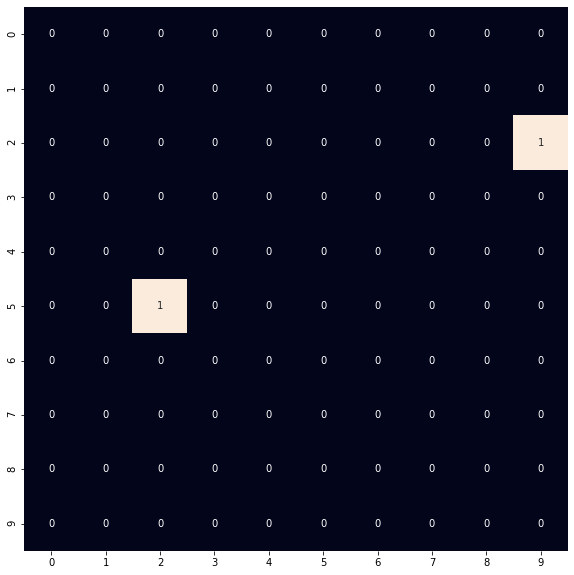

In [6]:
zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
for i in range(10):
    for j in range(10):
        if(total_sum[i][j] == 0):
            zero_sum[i][j] += 1

# show heatmap - 1 represents winless squares
plt.figure(figsize = (10,10))
sns.heatmap(zero_sum, annot=True, square=True, cbar=False)

## How many squares have an above average expected value?

14 squares have an above average expected value
The sum of their expected values is: $302.43, which is 60.49% of the total winnings


<AxesSubplot:>

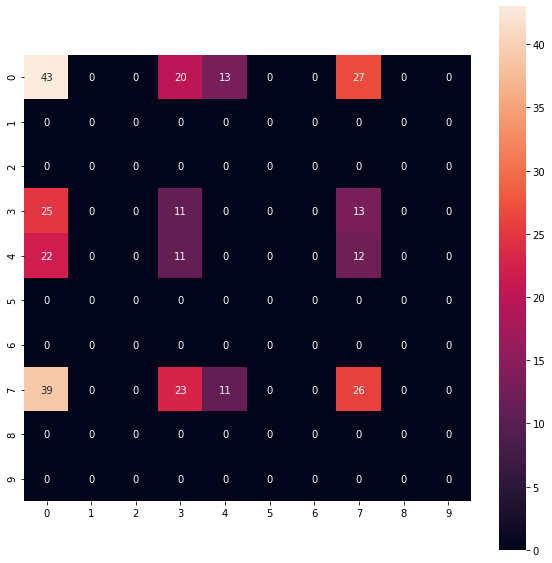

In [8]:
above_avg_by_col = (total_ev > 10).sum()
above_avg = above_avg_by_col.sum()
print(f"{above_avg} squares have an above average expected value")  

count = 0
above_avg_df = pd.DataFrame(0, index=range(10), columns=range(10))
for i in range(10):
    for j in range(10):
        if(total_ev[i][j] > 10):
            above_avg_df[i][j] += total_ev[i][j]
            count += total_ev[i][j]
            
count_percent = round(100*count/500,2)
print(f"The sum of their expected values is: ${round(count,2)}, which is {count_percent}% of the total winnings")

plt.figure(figsize = (10,10))
sns.heatmap(above_avg_df, annot=True, square=True)

## Number of occurances by quarter
Top left: 1st Quarter------Top right: 2nd Quarter  
Bottom left: 3rd Quarter------Bottom right: 4th quarter  

<AxesSubplot:>

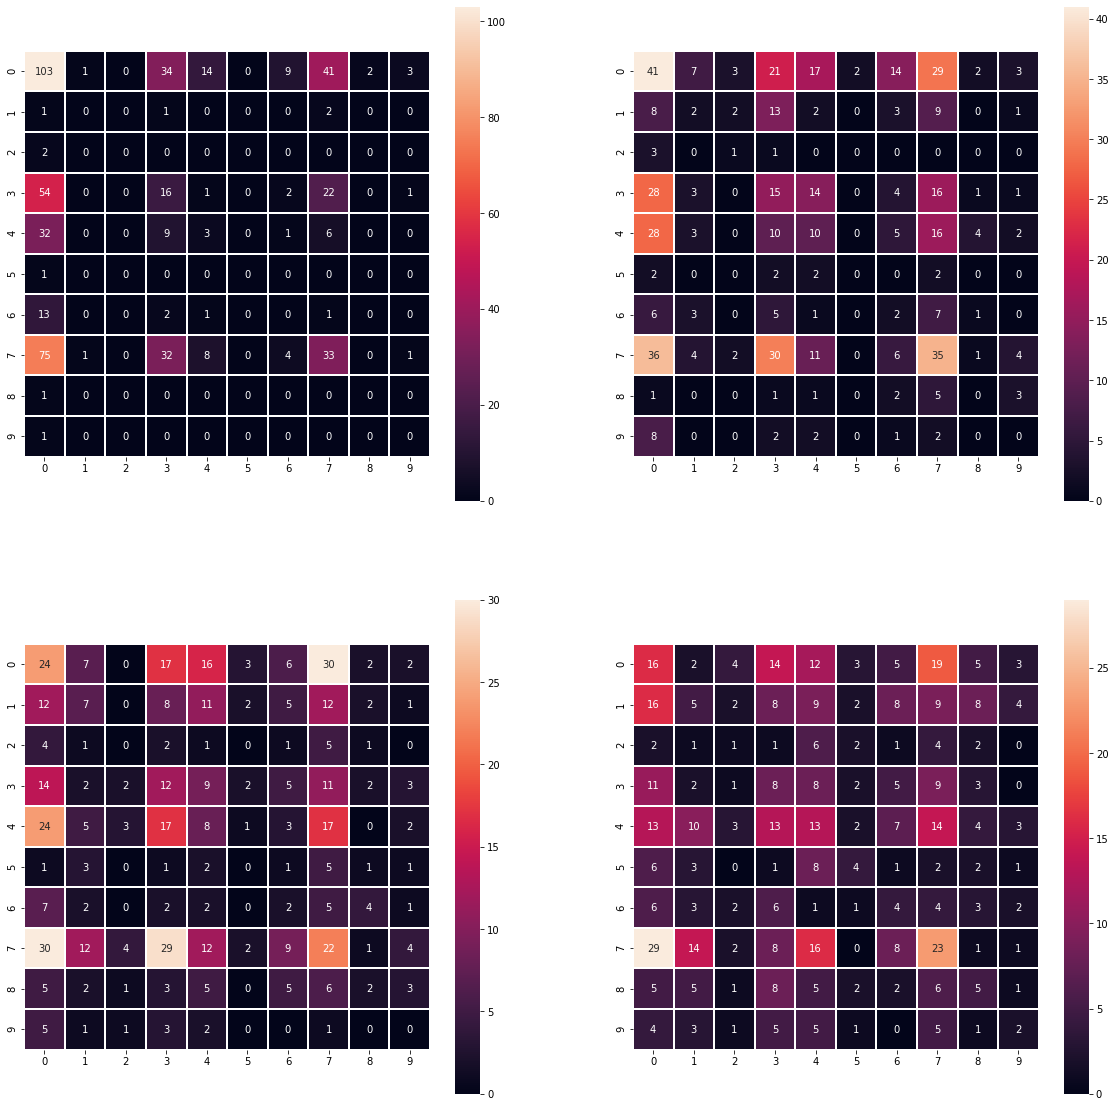

In [14]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,20))
sns.heatmap(q1_sum, ax=ax1, annot=True, linewidth=1, linecolor='w', square=True, fmt='.3g')
sns.heatmap(q2_sum, ax=ax2, annot=True, linewidth=1, linecolor='w', square=True)
sns.heatmap(q3_sum, ax=ax3, annot=True, linewidth=1, linecolor='w', square=True)
sns.heatmap(q4_sum, ax=ax4, annot=True, linewidth=1, linecolor='w', square=True)

## Overall number of occurances

<AxesSubplot:>

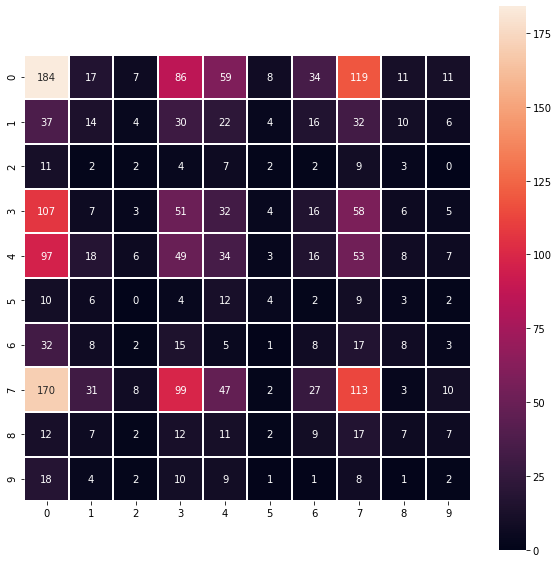

In [13]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.heatmap(total_sum, ax=ax, annot=True, linewidth=1, linecolor='w', square=True, fmt='.3g')

## Expected values for individual quarters

<AxesSubplot:>

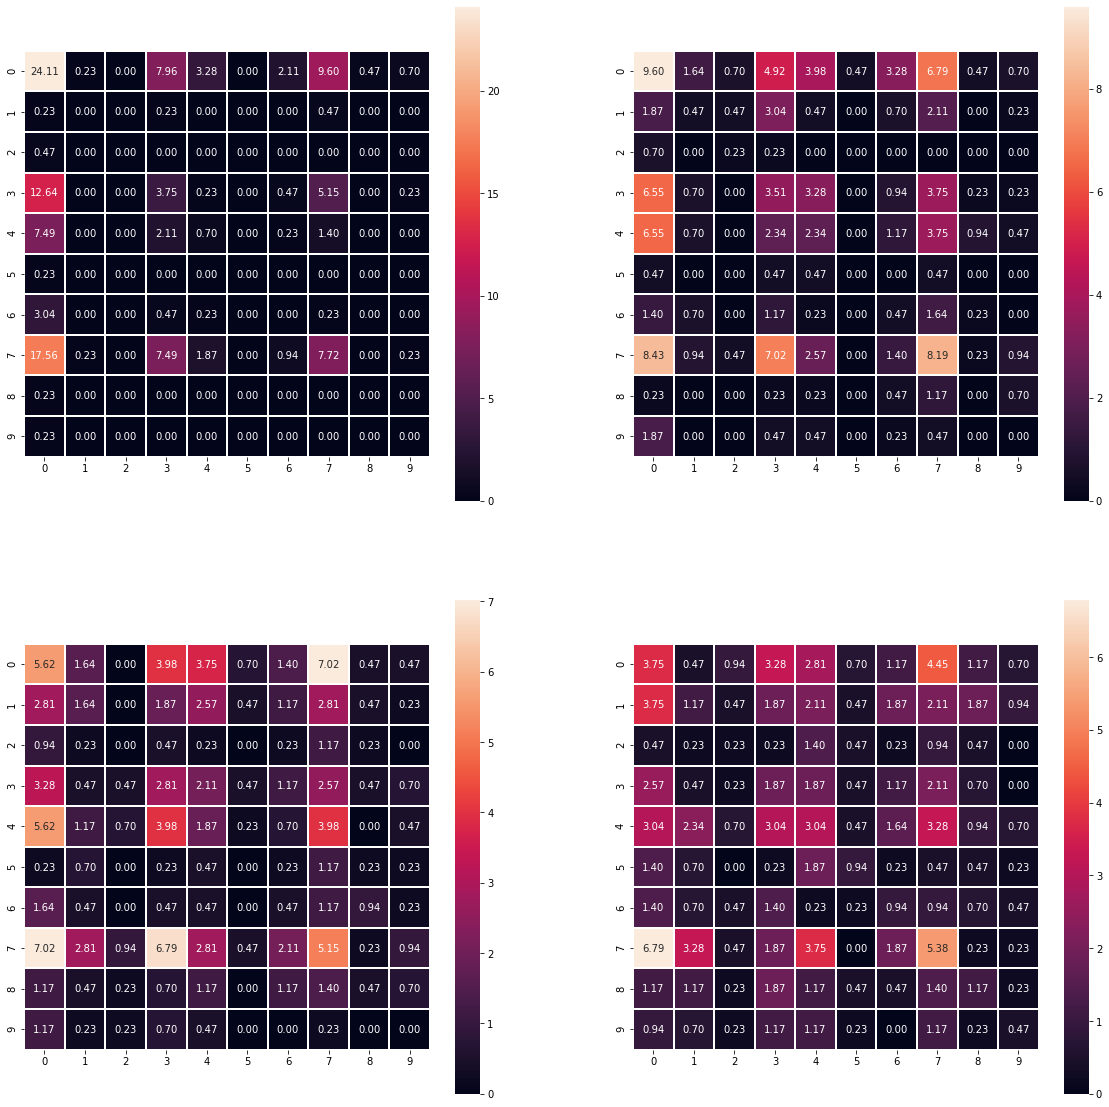

In [19]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,20))
sns.heatmap(q1_ev, ax=ax1, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')
sns.heatmap(q2_ev, ax=ax2, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')
sns.heatmap(q3_ev, ax=ax3, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')
sns.heatmap(q4_ev, ax=ax4, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')

## Overall expected values

<AxesSubplot:>

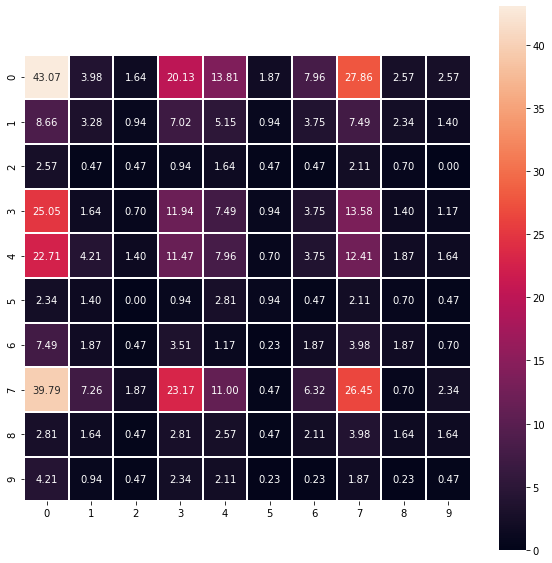

In [18]:
fig2, ax5 = plt.subplots(1, figsize=(10,10))
sns.heatmap(total_ev, ax=ax5, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')